<a href="https://colab.research.google.com/github/DipeshChothwe/NLP/blob/master/Sentiment_analysis_(Corona_virus_outbreak).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install GetOldTweets3
import string
from collections import Counter

import matplotlib.pyplot as plt

In [3]:

def get_tweets(date1, date2, tweetname):
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(tweetname) \
        .setSince(date1) \
        .setUntil(date2) \
        .setLang('en') \
        .setMaxTweets(1000)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [5]:

# reading text file
text_before_corona = ""
text_after_corona = ""
text_tweets_before_corona = get_tweets("2019-07-30", "2020-01-29", "#disease")
text_tweets_after_corona = get_tweets("2020-01-30", "2020-05-30", "#corona")

length1 = len(text_tweets_before_corona)
length2= len(text_tweets_after_corona)

for i in range(0, length1):
    text_before_corona = text_tweets_before_corona[i][0] + " " + text_before_corona

for i in range(0, length2):
    text_after_corona = text_tweets_after_corona[i][0] + " " + text_after_corona

# converting to lowercase
lower_case_before_corona = text_before_corona.lower()
lower_case_after_corona = text_after_corona.lower()

# Removing punctuations
cleaned_lower_case_before_corona = lower_case_before_corona.translate(str.maketrans('', '', string.punctuation))
cleaned_lower_case_after_corona = lower_case_after_corona.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words_before_corona = cleaned_lower_case_before_corona.split()
tokenized_words_after_corona = cleaned_lower_case_after_corona.split()

In [6]:
# Print texts
text_tweets_before_corona 
text_tweets_after_corona 

[['AWD Protective Gear - TYPE IIR Masks #Facemasks #Protection #CoronaVirus #CDC #News #Wholesale #Sale #Facemask #Covid19 #Corona #Quarantine #Lockdown Retail Avail. https://awdprotectivegear.com/collections/awd-protective-gear/products/type-iir-face-mask-100-pieces-pack-awd-protective-gear'],
 ['The future should be "Social d(ist)ancing"! #RIP #Corona #SocialDistancing #Fuck'],
 ['Surgical 97% Protection Face Mask - Pieces Pack #Covid19 #Corona #Quarantine #Lockdown #Facemasks #Protection #CoronaVirus #CDC #News #Wholesale #Sale #Facemask Wholesale Quantities https://awdprotectivegear.com/collections/awd-protective-gear/products/awd-protective-gear-type-iir-face-mask-50-pieces-pack'],
 ['Most Efficient Reusable Face Masks in the Market #Covid19 #Corona #Quarantine #Lockdown #Facemasks #Protection #CoronaVirus #CDC #News #Wholesale #Sale #Facemask All Sizes https://awdprotectivegear.com/collections/breathing-armor/products/breathing-armor-face-mask-100-pieces-pack'],
 ['United States 

In [7]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words_before_corona = [word for word in tokenized_words_before_corona if word not in stop_words]
final_words_after_corona = [word for word in tokenized_words_after_corona if word not in stop_words]

In [8]:
# Get emotions text
emotion_list_before_corona = []
emotion_list_after_corona = []
with open('/content/drive/My Drive/NLP/emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words_before_corona:
            emotion_list_before_corona.append(emotion)
        if word in final_words_after_corona:
            emotion_list_after_corona.append(emotion)

w_before_corona = Counter(emotion_list_before_corona)
w_after_corona = Counter(emotion_list_after_corona)

print("before corona:")
print(w_before_corona)

print("after corona:")
print(w_after_corona)

before corona:
Counter({' sad': 8, ' attracted': 7, ' happy': 6, ' fearful': 4, ' adequate': 3, ' angry': 2, ' average': 2, ' attached': 2, ' ecstatic': 2, ' free': 2, ' hated': 2, ' entitled': 2, ' anxious': 2, ' loved': 2, ' powerless': 2, ' fearless': 1, ' safe': 1, ' focused': 1, ' singled out': 1, ' lost': 1, ' esteemed': 1, ' independent': 1, ' alone': 1})
after corona:
Counter({' happy': 13, ' sad': 10, ' attracted': 4, ' fearful': 4, ' powerless': 3, ' entitled': 3, ' free': 3, ' adequate': 3, ' independent': 2, ' fearless': 2, ' safe': 2, ' angry': 2, ' anxious': 2, ' ecstatic': 2, ' attached': 2, ' hated': 2, ' esteemed': 2, ' bored': 1, ' average': 1, ' surprise': 1, ' focused': 1, ' singled out': 1, ' lost': 1, ' alone': 1, ' loved': 1})


NameError: ignored

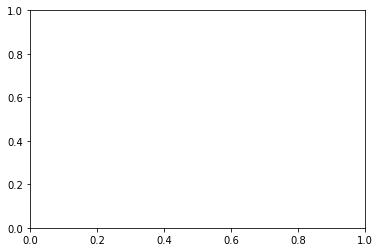

In [9]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [10]:
def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#recovery') \
        .setSince("2020-01-30") \
        .setUntil("2020-05-30") \
        .setLang('en') \
        .setMaxTweets(1000)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [11]:
text_tweets = get_tweets()
text_tweets

[['My 32nd weekly VideoCast on #stockmarket Commentary and Recap is out. #Economy #Recovery #China #Earnings #Energy #Estimates #FederalReserve #Financials #Industrials #Investing You can watch, "Hedge Fund Tips with Tom Hayes – VideoCast – Episode 32" here: https://www.hedgefundtips.com/hedge-fund-tips-with-tom-hayes-videocast-episode-32/'],
 ['Get my free ebook Self-Care and Balance for Codependents. https://wakeuprecovery.com/codependency-balance-and-self-care-quiz/ #codependent #Melodybeatty #recovery #boundary #balance #selflove #mentalhealth #wellness #loveyourself #health #motivation @Codependent'],
 ['Get my free ebook Self-Care and Balance for Codependents. https://wakeuprecovery.com/codependency-balance-and-self-care-quiz/ #codependent #Melodybeatty #recovery #boundary #balance #selflove #mentalhealth #wellness #loveyourself #health #motivation @Codependent'],
 ['Get my free ebook Self-Care and Balance for Codependents. https://wakeuprecovery.com/codependency-balance-and-self

In [12]:
# reading text file
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words = cleaned_text.split()

In [13]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [15]:
# Get emotions text
emotion_list = []
with open('/content/drive/My Drive/NLP/emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' happy': 14, ' sad': 9, ' attracted': 6, ' attached': 6, ' adequate': 4, ' fearless': 3, ' ecstatic': 3, ' fearful': 3, ' powerless': 3, ' esteemed': 2, ' codependent': 2, ' average': 2, ' free': 2, ' alone': 2, ' bored': 1, ' safe': 1, ' surprise': 1, ' focused': 1, ' lost': 1, ' hated': 1, ' lustful': 1, ' independent': 1, ' anxious': 1, ' loved': 1, ' cheated': 1})
